# Adiabatic structures

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from materials import GaAs,AlAs,Air,AlGaAsx
from SuperlatticeTMM.structure import StructureOA
from SuperlatticeTMM.raman import detection_spectrumOA,raman_analytic

In [1]:
def generate_unit_cell(D, r, freq):
    return [("AlAs",D*r*AlAs.c/freq/2),("GaAs",D*GaAs.c/freq*(1-r)),("AlAs",D*r*AlAs.c/freq/2)]

## Acoustic potential well

In [3]:
Ni = 33
r_values = np.pad(0.25*(1+np.sin((np.arange(1,Ni+1)*np.pi)/(Ni+1))**2), pad_width=5, constant_values=0.25)

In [4]:
params = []
for r in r_values:
    params.extend(generate_unit_cell(1,r,300))
params = np.array(params, dtype=[('materials','U10'),('thickness',np.float64)])
struct = StructureOA(params)

In [5]:
np.sum(struct.ds)

729.1333333333334

([<matplotlib.axis.XTick at 0x7f8a5ae77730>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

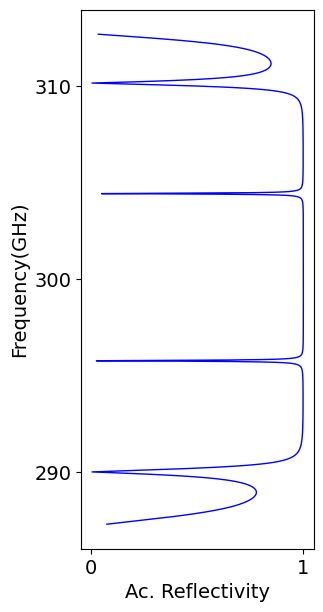

In [7]:
plt.figure(figsize=(3,7))
freq_range = np.arange(287.3,312.7,0.01)
plt.plot(np.sqrt(struct.get_acoustic_refl(freq_range,GaAs,GaAs)),freq_range,c='blue',lw=1)
plt.xlabel("Ac. Reflectivity",fontsize=14)
plt.ylabel("Frequency(GHz)",fontsize=14)
plt.yticks([290,300,310],fontsize=14)
plt.xticks([0,1],fontsize=14)

In [11]:
from scipy.optimize import minimize_scalar
fsd = minimize_scalar(lambda x: struct.get_acoustic_refl(np.array([x]),GaAs,GaAs)[0],bounds=[290,300],method='bounded')
fsu = minimize_scalar(lambda x: struct.get_acoustic_refl(np.array([x]),GaAs,GaAs)[0],bounds=[300,310],method='bounded')
fsd.x, fsu.x

(295.77114760967885, 304.43199673545615)

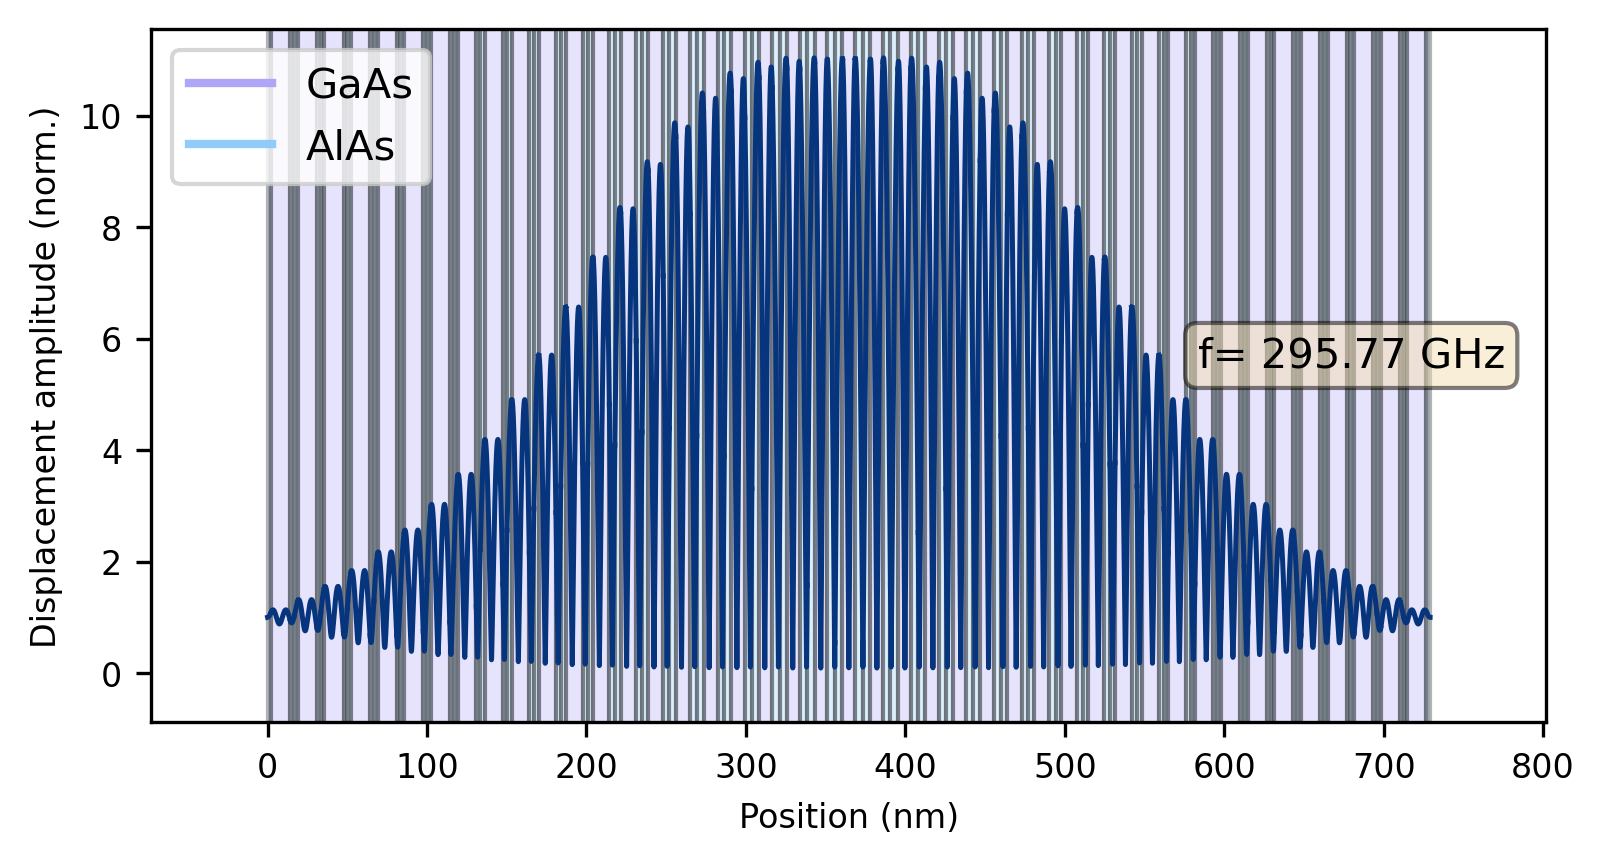

In [13]:
struct.plot_field('acoustic','modulus',fsd.x,GaAs,GaAs,h=11)

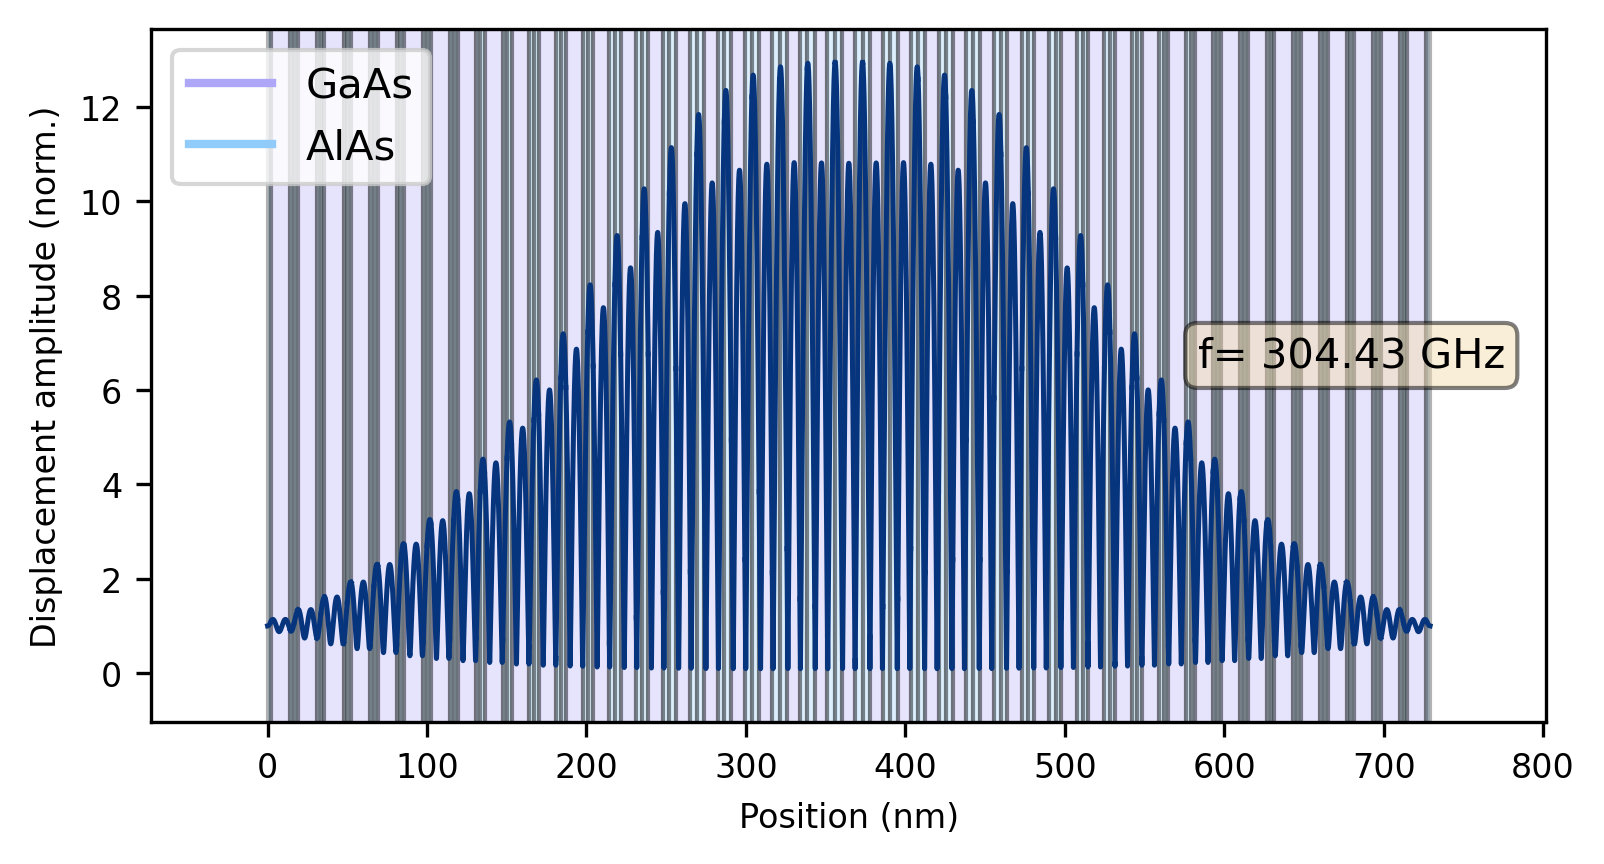

In [23]:
struct.plot_field('acoustic','modulus',fsu.x,GaAs,GaAs,h=13)

## Acoustic single sided potential well

In [22]:
Ni = 13
D_values = np.pad(1+0.06*np.sin((np.arange(1,Ni+1)*np.pi)/(Ni+1))**2, pad_width=8, constant_values=1)

In [23]:
params = []
for D in D_values:
    params.extend(generate_unit_cell(D,0.25,300))
params = np.array(params, dtype=[('materials','U10'),('thickness',np.float64)])
struct = StructureOA(params)

In [24]:
np.sum(struct.ds)

490.33333333333337

In [10]:
struct.ds

array([ 2.35833333, 11.95      ,  2.35833333,  2.35833333, 11.95      ,
        2.35833333,  2.35833333, 11.95      ,  2.35833333,  2.35833333,
       11.95      ,  2.35833333,  2.35833333, 11.95      ,  2.35833333,
        2.35833333, 11.95      ,  2.35833333,  2.35833333, 11.95      ,
        2.35833333,  2.35833333, 11.95      ,  2.35833333,  2.36533979,
       11.98550266,  2.36533979,  2.38497143, 12.08497891,  2.38497143,
        2.41333998, 12.22872625,  2.41333998,  2.44482669, 12.38827375,
        2.44482669,  2.47319524, 12.53202109,  2.47319524,  2.49282688,
       12.63149734,  2.49282688,  2.49983333, 12.667     ,  2.49983333,
        2.49282688, 12.63149734,  2.49282688,  2.47319524, 12.53202109,
        2.47319524,  2.44482669, 12.38827375,  2.44482669,  2.41333998,
       12.22872625,  2.41333998,  2.38497143, 12.08497891,  2.38497143,
        2.36533979, 11.98550266,  2.36533979,  2.35833333, 11.95      ,
        2.35833333,  2.35833333, 11.95      ,  2.35833333,  2.35

([<matplotlib.axis.XTick at 0x7f7722566290>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

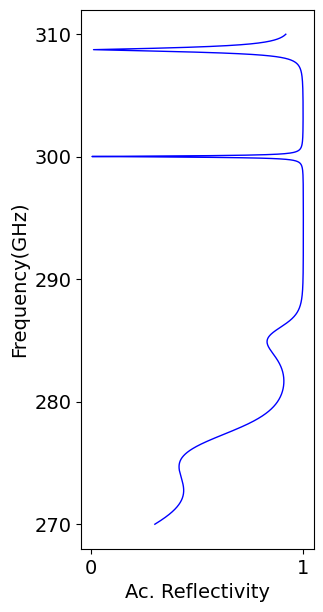

In [25]:
plt.figure(figsize=(3,7))
freq_range = np.arange(270,310,0.01)
plt.plot(np.sqrt(struct.get_acoustic_refl(freq_range,GaAs,GaAs)),freq_range,c='blue',lw=1)
plt.xlabel("Ac. Reflectivity",fontsize=14)
plt.ylabel("Frequency(GHz)",fontsize=14)
plt.yticks([270,280,290,300,310],fontsize=14)
plt.xticks([0,1],fontsize=14)

In [26]:
from scipy.optimize import minimize_scalar
fsa = minimize_scalar(lambda x: struct.get_acoustic_refl(np.array([x]),GaAs,GaAs)[0],bounds=[290,305],method='bounded')
fsa.x

300.0106236657425

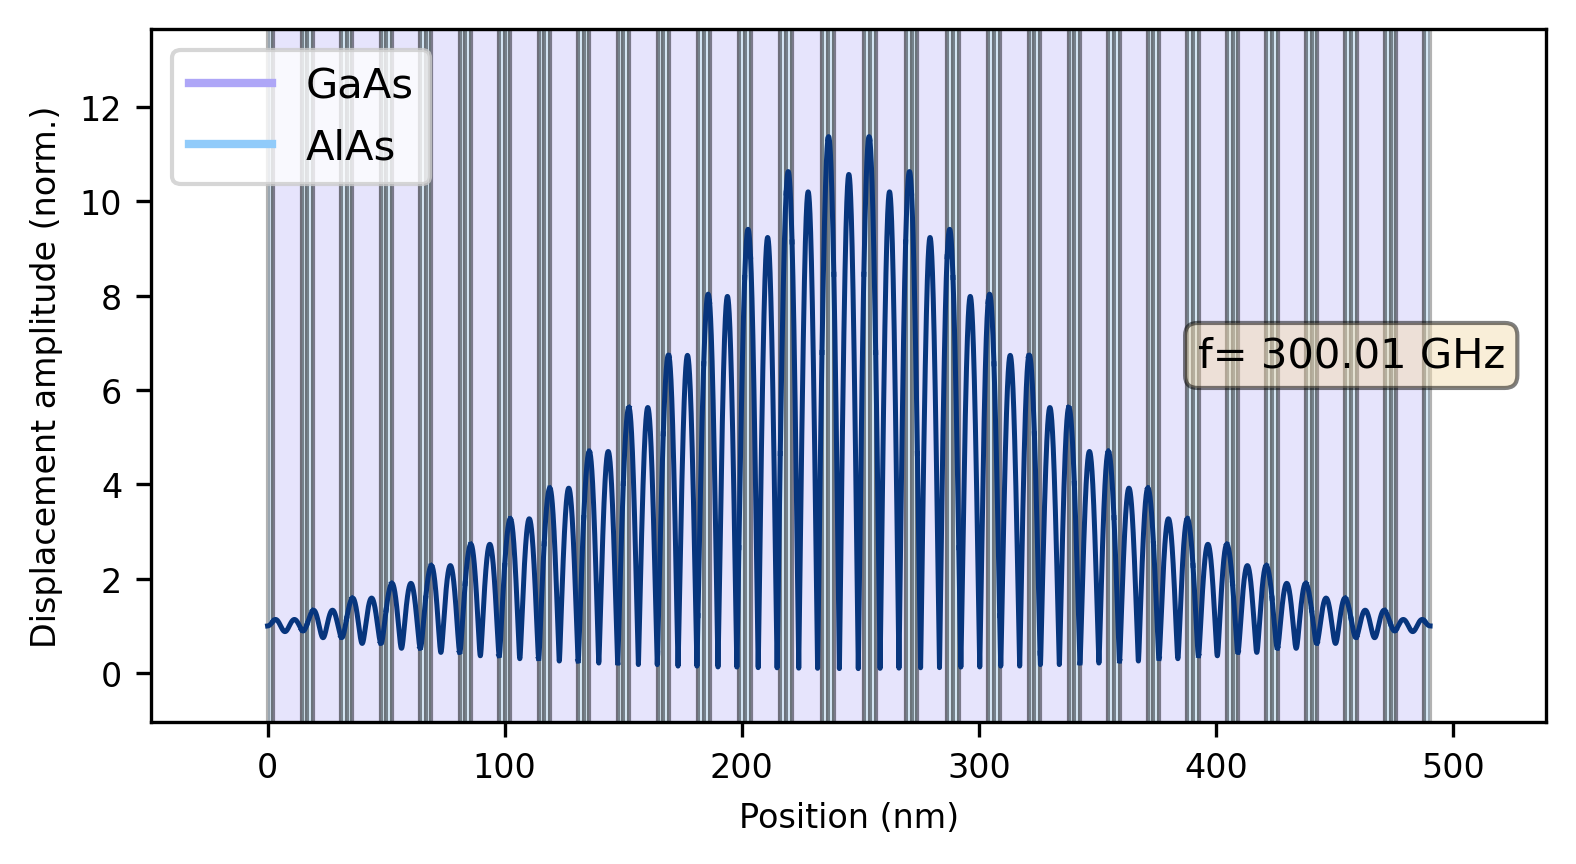

In [32]:
struct.plot_field('acoustic','modulus',fsa.x,GaAs,GaAs,h=13)

## Acoustic potential well by band inversion

In [43]:
Ni = 17
a1 = 0.25*(1+np.sin(np.arange(1,Ni+1)*np.pi/(Ni*2))**2)
Ni = 16
a2 = 0.25*(3-np.cos(np.arange(1,Ni+1)*np.pi/(Ni*2))**2)
r_values = np.pad(np.concatenate((a1,a2)),pad_width=16, constant_values=(0.25,0.75))

array([0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
       0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
       0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
       0.25      , 0.25212836, 0.25844097, 0.26872286, 0.28262389,
       0.29967067, 0.31928271, 0.34079213, 0.36346646, 0.38653354,
       0.40920787, 0.43071729, 0.45032933, 0.46737611, 0.48127714,
       0.49155903, 0.49787164, 0.5       , 0.50240184, 0.50951506,
       0.5210663 , 0.53661165, 0.55555372, 0.57716457, 0.60061371,
       0.625     , 0.64938629, 0.67283543, 0.69444628, 0.71338835,
       0.7289337 , 0.74048494, 0.74759816, 0.75      , 0.75      ,
       0.75      , 0.75      , 0.75      , 0.75      , 0.75      ,
       0.75      , 0.75      , 0.75      , 0.75      , 0.75      ,
       0.75      , 0.75      , 0.75      , 0.75      , 0.75      ])

In [45]:
params = []
for r in r_values:
    params.extend(generate_unit_cell(1,r,300))
params = np.array(params, dtype=[('materials','U10'),('thickness',np.float64)])
struct = StructureOA(params)

In [48]:
sum(struct.ds)

1131.3666666666684

([<matplotlib.axis.XTick at 0x7f771db6dea0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

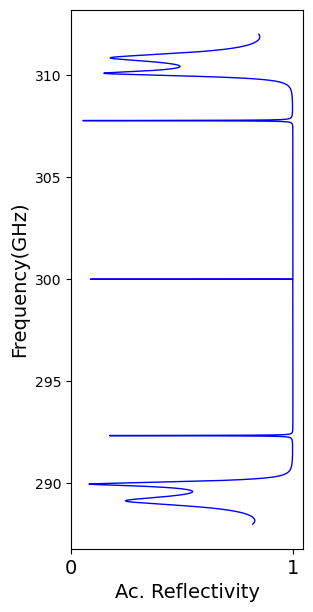

In [60]:
# big quality factor need more resolution
plt.figure(figsize=(3,7))
freq_range = np.arange(288,312,0.0002)
plt.plot(np.sqrt(struct.get_acoustic_refl(freq_range,GaAs,GaAs)),freq_range,c='blue',lw=1)
plt.xlabel("Ac. Reflectivity",fontsize=14)
plt.ylabel("Frequency(GHz)",fontsize=14)
plt.yticks([290,300,310],fontsize=14)
plt.xticks([0,1],fontsize=14)

In [62]:
fad = minimize_scalar(lambda x: struct.get_acoustic_refl(np.array([x]),GaAs,GaAs)[0],bounds=[292,298],method='bounded')
fam = minimize_scalar(lambda x: struct.get_acoustic_refl(np.array([x]),GaAs,GaAs)[0],bounds=[298,305],method='bounded')
fau = minimize_scalar(lambda x: struct.get_acoustic_refl(np.array([x]),GaAs,GaAs)[0],bounds=[304,308],method='bounded')
fad.x,fam.x,fau.x


(292.3406866634779, 299.99777005603994, 307.7695353053817)

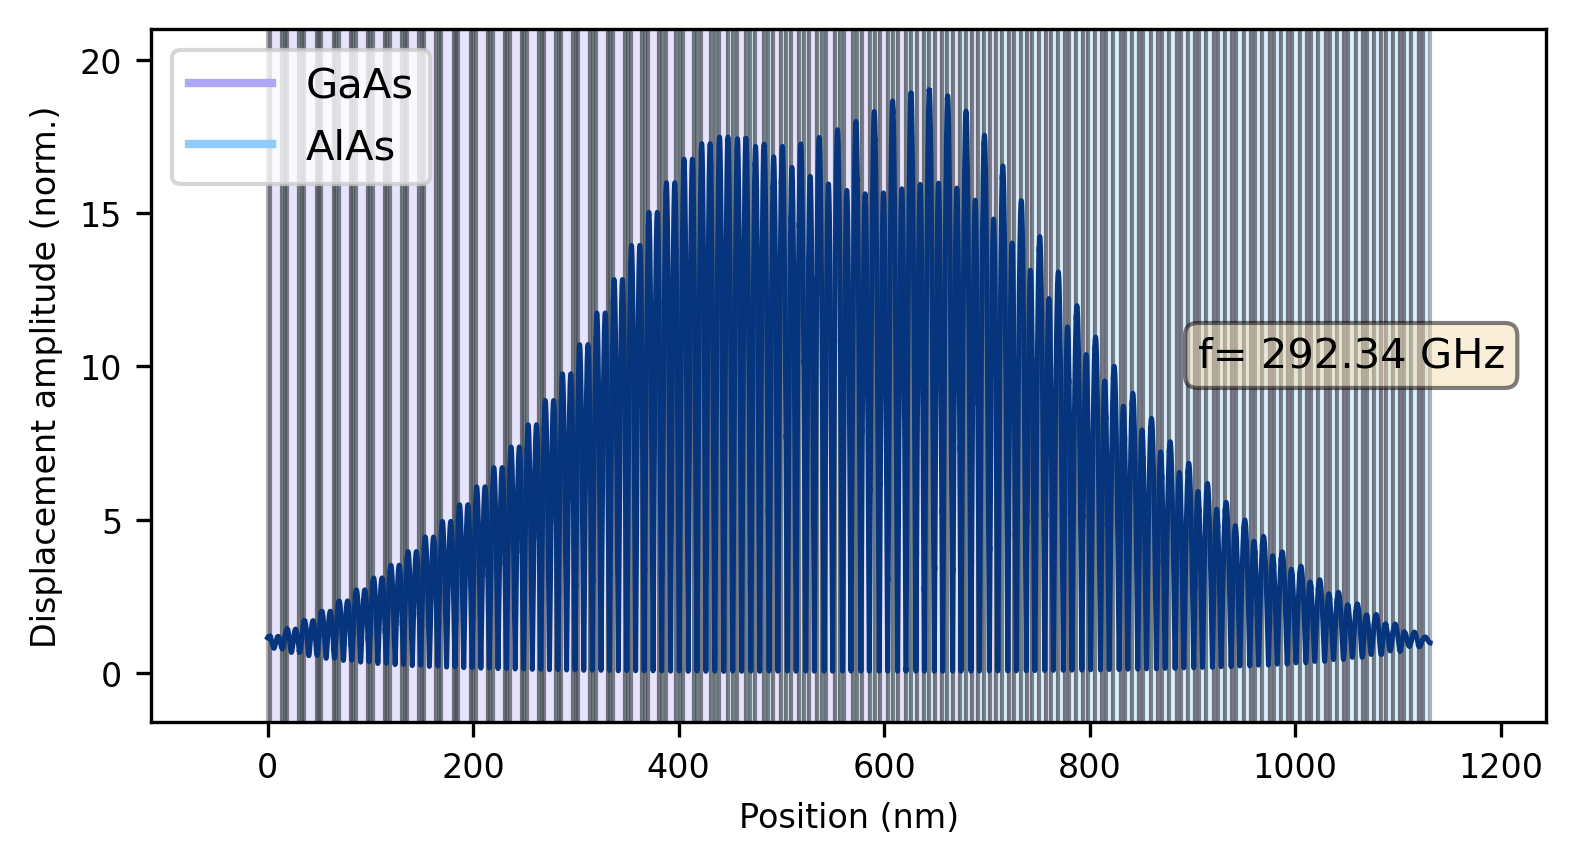

In [73]:
struct.plot_field('acoustic','modulus',fad.x,GaAs,GaAs,h=20)

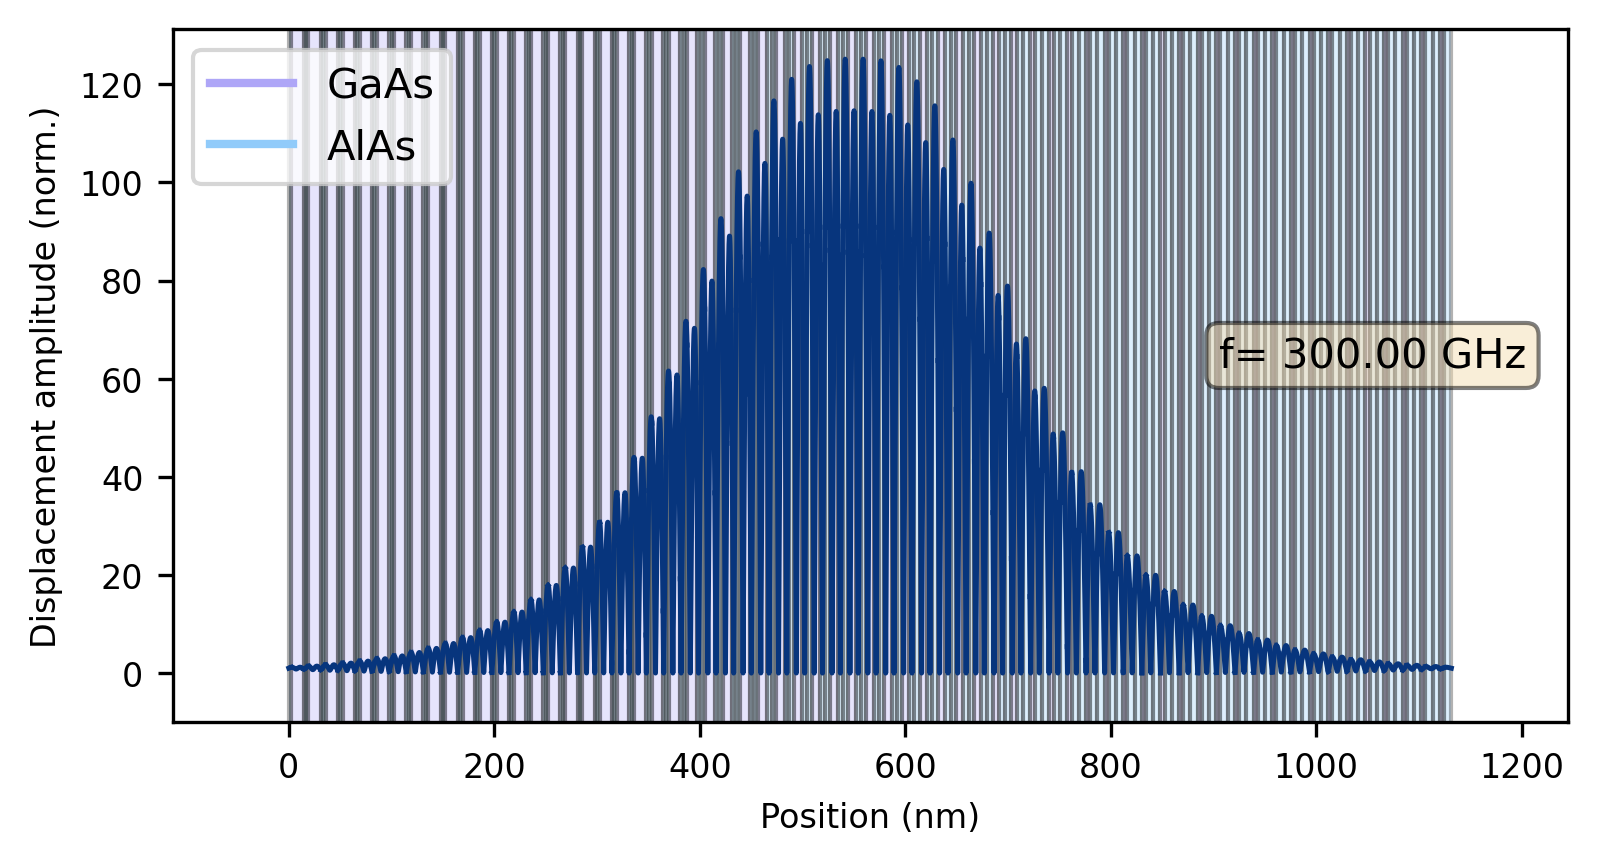

In [89]:
struct.plot_field('acoustic','modulus',fam.x,GaAs,GaAs,h=125)

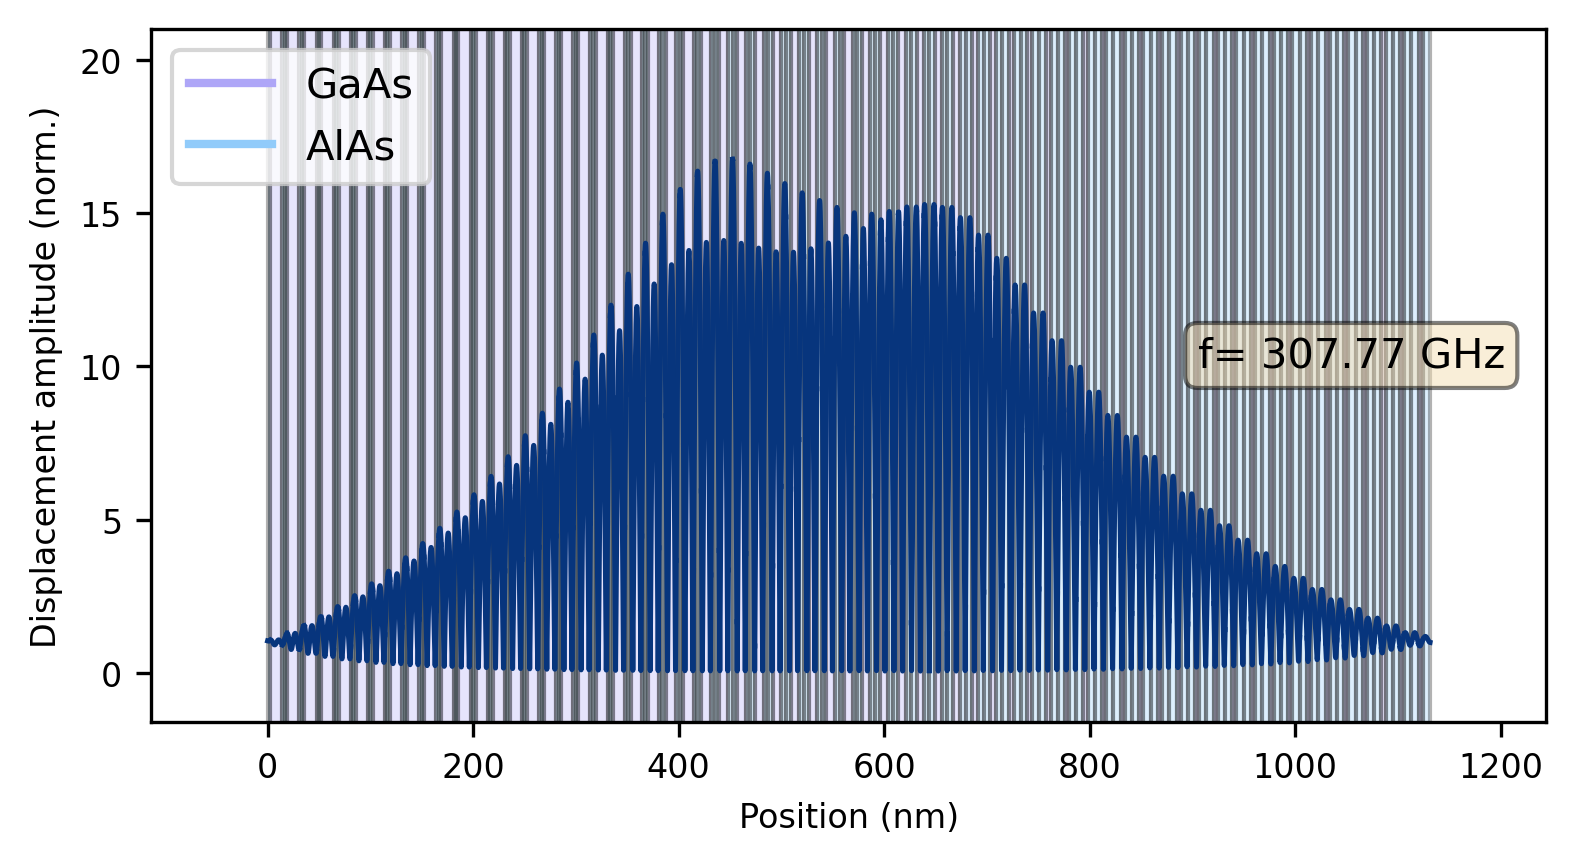

In [70]:
struct.plot_field('acoustic','modulus',fau.x,GaAs,GaAs,h=20)